In [42]:
import numpy as np
import pandas as pd
import datetime
import random
import sklearn

import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore")                 

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as sm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
import shap

In [44]:
import os
os.getcwd()

'/Users/danny/Desktop/MDS/master 4/CITS 5553 Data Science Capstone Project/Individual/Capstone-Individual/Data'

In [45]:
os.chdir('/Users/danny/Desktop/MDS/master 4/CITS 5553 Data Science Capstone Project/Individual/Capstone-Individual/Data')

In [46]:
df = pd.read_csv('processed_data_1.csv', index_col = 0)
df.head(20)

,Operational Demand (MW),Transpiration,Rain,Evaporation,Max Temp,Min Temp,Max Hum,Min Hum,Av Wind,Solar Rad,...,sin_month,cos_month,sin_Day_of_week,cos_Day_of_week,sin_Day_of_month,cos_Day_of_month,sin_Day_of_year,cos_Day_of_year,sin_week_of_year,cos_week_of_year
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-01,95141.184,11.2,0.0,11.6,37.2,18.8,65.0,20.0,6.10,34.01,...,0.5,0.866025,0.433884,-0.900969,2.079117e-01,0.978148,0.017213,0.999852,0.120537,0.992709
2009-02-01,108058.504,10.2,0.0,12.8,36.1,21.9,70.0,25.0,5.31,34.25,...,0.5,0.866025,-0.433884,-0.900969,4.067366e-01,0.913545,0.034422,0.999407,0.120537,0.992709
2009-03-01,95788.860,9.4,0.0,11.8,34.4,20.3,79.0,29.0,5.45,34.11,...,0.5,0.866025,-0.974928,-0.222521,5.877853e-01,0.809017,0.051620,0.998667,0.120537,0.992709
2009-04-01,93777.404,10.5,0.0,11.2,36.5,18.5,62.0,20.0,5.25,34.05,...,0.5,0.866025,-0.781831,0.623490,7.431448e-01,0.669131,0.068802,0.997630,0.120537,0.992709
2009-05-01,112678.424,11.9,0.0,11.4,37.2,21.8,63.0,17.0,6.77,34.18,...,0.5,0.866025,0.000000,1.000000,8.660254e-01,0.500000,0.085965,0.996298,0.239316,0.970942
2009-06-01,111824.976,10.1,0.0,12.0,36.4,19.7,73.0,26.0,5.42,33.82,...,0.5,0.866025,0.781831,0.623490,9.510565e-01,0.309017,0.103102,0.994671,0.239316,0.970942
2009-07-01,110104.118,10.7,0.0,12.0,36.3,18.9,63.0,21.0,5.83,33.85,...,0.5,0.866025,0.974928,-0.222521,9.945219e-01,0.104528,0.120208,0.992749,0.239316,0.970942
2009-08-01,114229.828,10.5,0.0,10.8,37.2,20.3,60.0,24.0,5.19,33.96,...,0.5,0.866025,0.433884,-0.900969,9.945219e-01,-0.104528,0.137279,0.990532,0.239316,0.970942
2009-09-01,113488.238,10.3,0.0,12.6,37.1,19.1,67.0,27.0,5.28,34.40,...,0.5,0.866025,-0.433884,-0.900969,9.510565e-01,-0.309017,0.154309,0.988023,0.239316,0.970942


In [47]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in df.columns:
    if df[i].dtype not in numeric_dtypes:
        df[i]=df[i].str.replace(" ",'') # Replace all ' ' into none
        df[i]=pd.to_numeric(df[i])


In [48]:
df.index = pd.to_datetime(df.index,format= '%Y/%m/%d')
select_col=['Operational Demand (MW)', 'Transpiration', 'Rain', 'Evaporation',
       'Max Temp', 'Min Temp', 'Max Hum', 'Min Hum', 'Av Wind', 'Solar Rad',
       'state_holiday', 'sin_month', 'cos_month', 'sin_Day_of_week',
       'cos_Day_of_week', 'sin_Day_of_month', 'cos_Day_of_month',
       'sin_Day_of_year', 'cos_Day_of_year', 'sin_week_of_year',
       'cos_week_of_year']
y_col=['Operational Demand (MW)']
x_col=list(set(select_col)-set(y_col))

model_df=df[select_col].fillna(method='ffill',axis=0)
test_dat = model_df[(model_df.index >= '2021-12-01') & ('2022-04-01' > model_df.index)]
training_dat = model_df[(model_df.index < '2021-12-01') | ('2022-04-01' < model_df.index)]

In [49]:
X_train = training_dat.drop('Operational Demand (MW)',axis=1)
y_train = training_dat['Operational Demand (MW)']

X_test = test_dat.drop('Operational Demand (MW)', axis = 1) 
y_test = test_dat['Operational Demand (MW)']

In [50]:
def ImportanceDisplay(model):
    if 'grid' in model:
        impo_lst=[model,'.best_estimator_.feature_importances_']
    else:
        impo_lst=[model,'.feature_importances_']
    impo_str=''
    importance = eval(impo_str.join(impo_lst))
    #importance = rf_reg.feature_importances_
    table = PrettyTable(['Factors','Score'])
    for i,v in enumerate(importance):
	    table.add_row([x_col[i],round(v,4)])
    print(table)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4910 entries, 2009-01-01 to 2022-08-15
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Operational Demand (MW)  4910 non-null   float64
 1   Transpiration            4910 non-null   float64
 2   Rain                     4910 non-null   float64
 3   Evaporation              4910 non-null   float64
 4   Max Temp                 4910 non-null   float64
 5   Min Temp                 4910 non-null   float64
 6   Max Hum                  4910 non-null   float64
 7   Min Hum                  4910 non-null   float64
 8   Av Wind                  4910 non-null   float64
 9   Solar Rad                4910 non-null   float64
 10  state_holiday            4910 non-null   int64  
 11  sin_month                4910 non-null   float64
 12  cos_month                4910 non-null   float64
 13  sin_Day_of_week          4910 non-null   float64
 14  cos_Da

In [52]:
forest = RandomForestRegressor(criterion='mse', 
                                max_depth=15, # depth of tree 
                                min_samples_leaf=100, 
                                random_state=42)

forest.fit(X_train, y_train)
y_predict_forest = forest.predict(X_test)
ny_test = len(y_test)
mape = (sum(np.abs((y_test - y_predict_forest)/y_test))/ny_test)*100
print('training mape', mape)

ImportanceDisplay('forest')
# print(forest.best_estimator_)
# print(forest.best_score_)


training mape 6.561538043737293
+------------------+--------+
|     Factors      | Score  |
+------------------+--------+
|       Rain       | 0.0046 |
|  state_holiday   |  0.0   |
| sin_Day_of_month | 0.0005 |
|     Min Temp     | 0.477  |
|     Av Wind      | 0.2229 |
| cos_Day_of_week  | 0.0008 |
|     Max Hum      | 0.0002 |
|     Min Hum      | 0.0001 |
|   Evaporation    | 0.0495 |
|    cos_month     |  0.0   |
|     Max Temp     | 0.0001 |
| sin_Day_of_year  | 0.0001 |
| cos_week_of_year | 0.1728 |
| sin_week_of_year | 0.0003 |
| cos_Day_of_month | 0.0001 |
|    Solar Rad     | 0.0001 |
| cos_Day_of_year  | 0.0023 |
|  Transpiration   | 0.0662 |
| sin_Day_of_week  | 0.001  |
|    sin_month     | 0.0014 |
+------------------+--------+


In [53]:
select_col_fs=['Operational Demand (MW)','sin_Day_of_year','Max Hum','cos_Day_of_year']
y_col_fs=['Operational Demand (MW)']
x_col_fs=list(set(select_col)-set(y_col))
model_df_fs=df[select_col].fillna(method='ffill',axis=0)
test_dat_fs = model_df[(model_df.index >= '2021-12-01') & ('2022-04-01' > model_df.index)]
training_dat_fs = model_df[(model_df.index < '2021-12-01') | ('2022-04-01' < model_df.index)]
X_train_fs = training_dat_fs.drop('Operational Demand (MW)',axis=1)
y_train_fs = training_dat_fs['Operational Demand (MW)']

X_test_fs = test_dat_fs.drop('Operational Demand (MW)', axis = 1) 
y_test_fs = test_dat_fs['Operational Demand (MW)']
forest = RandomForestRegressor(criterion='mse', 
                                max_depth=15, # depth of tree 
                                min_samples_leaf=100, 
                                random_state=42)
forest.fit(X_train_fs, y_train_fs)
y_predict_forest_fs = forest.predict(X_test_fs)
ny_test_fs = len(y_test_fs)
mape_fs = (sum(np.abs((y_test_fs - y_predict_forest_fs)/y_test_fs))/ny_test_fs)*100
print('training mape', mape)

training mape 6.561538043737293


In [54]:
# y_predict_forest_fs = pd.DataFrame(y_predict_forest_fs)
# predict_table = pd.DataFrame(y_test_fs)
# predict_table.insert(1,'predict',y_predict_forest_fs)
y_predict_forest = pd.DataFrame(y_predict_forest)
predict_table = pd.DataFrame(y_test)
predict_table.insert(1,'predict',y_predict_forest)
predict_table

,Operational Demand (MW),predict
Date,,
2021-12-01,97195.666,105617.854941
2021-12-02,86609.562,96537.269626
2021-12-03,95933.178,102038.722284
2021-12-04,91699.330,96216.057679
2021-12-05,96729.174,96840.263262
...,...,...
2022-02-07,96103.648,95922.283253
2022-03-07,94964.056,94801.252839
2022-01-08,115907.350,99435.836153


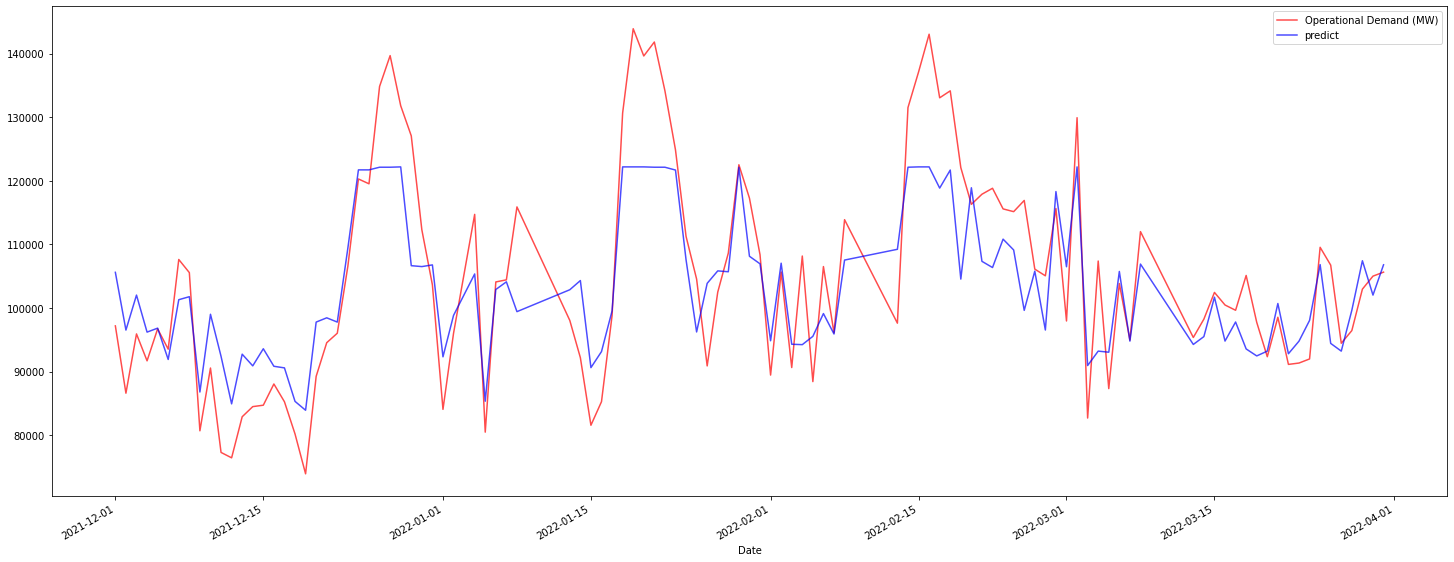

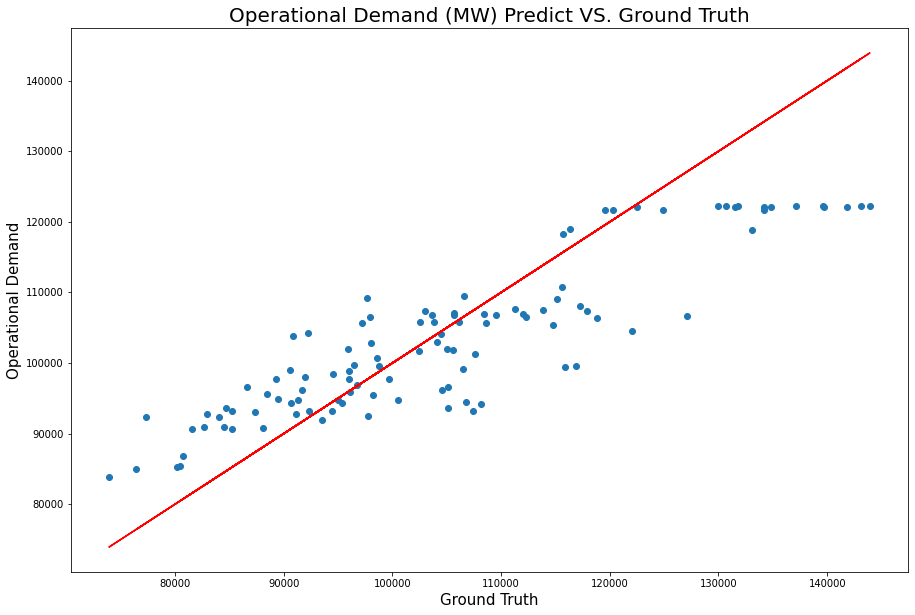

In [55]:
predict_table.plot.line(figsize = (25,10), color = ['red','blue'],alpha = 0.7)
plt.show()
plt.figure(figsize=(15,10))
plt.scatter(predict_table['Operational Demand (MW)'], predict_table['predict'])
plt.plot(predict_table['Operational Demand (MW)'],predict_table['Operational Demand (MW)'], c= 'red')
plt.xlabel('Ground Truth',fontsize = 15)
plt.ylabel("Operational Demand", fontsize = 15)
plt.title("Operational Demand (MW) Predict VS. Ground Truth", fontsize = 20)
plt.show()

In [56]:
order_table = predict_table.sort_values('Operational Demand (MW)',ascending=True)
order_table.tail(50)

,Operational Demand (MW),predict
Date,,
2022-03-30,105020.328,102038.722284
2022-02-27,105071.118,96546.521179
2022-03-18,105128.118,93569.971753
2021-12-08,105573.200,101786.313890
2022-03-31,105647.568,106802.198565
2022-02-02,105668.284,107054.261205
2022-02-26,106125.340,105802.322082
2022-02-06,106524.926,99131.219132
2021-12-23,106579.370,109431.403103


In [57]:
new_df_summer = pd.DataFrame()
for i in range(2009,2023):
    s0 = str(i) + '-12-01'
    s1 = str(i+1) + '-04-01'
    df_summer = model_df[(model_df.index >= s0) & (s1 > model_df.index)]
    order_table = df_summer.sort_values('Operational Demand (MW)',ascending=False)
    nr = order_table[0:1]
    new_df_summer = pd.concat((new_df_summer,nr))
new_df_summer['Operational Demand (MW)']

Date
2010-02-25    138724.472
2011-02-25    143406.550
2012-01-25    146936.248
2013-02-13    140522.666
2013-12-02    142052.022
2015-01-28    143380.004
2016-03-14    147741.444
2016-12-21    127495.266
2018-03-13    132436.530
2019-03-12    126096.472
2019-12-13    133655.944
2020-12-24    130318.900
2022-01-19    143929.714
2022-12-05    110098.150
Name: Operational Demand (MW), dtype: float64

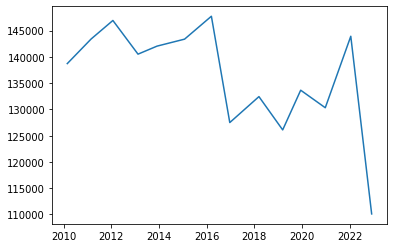

In [58]:
od = new_df_summer['Operational Demand (MW)']
plt.plot(od.index,od)

## SHAP Explain

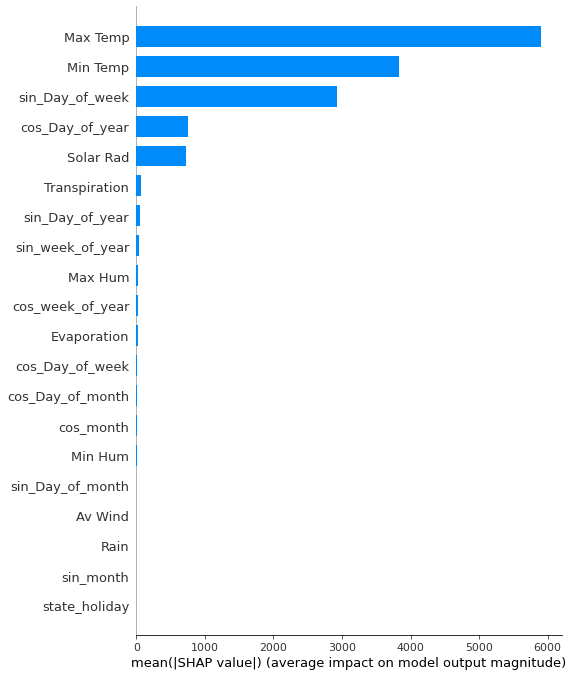

In [59]:
shap_values = shap.TreeExplainer(forest).shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

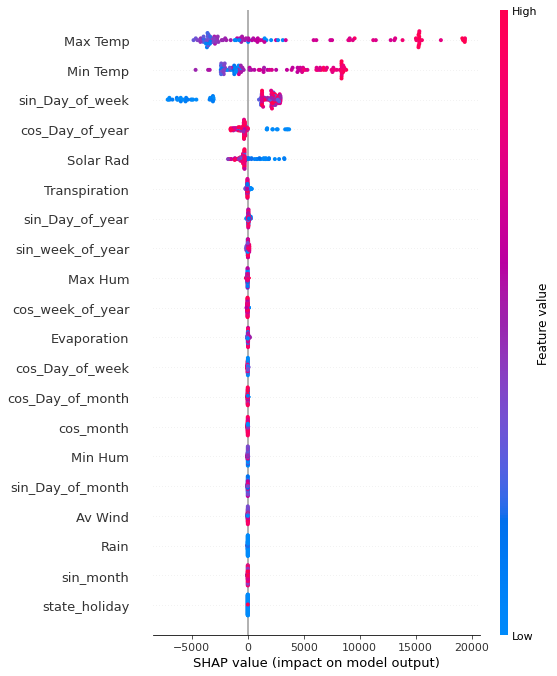

In [60]:
shap.summary_plot(shap_values, X_test)

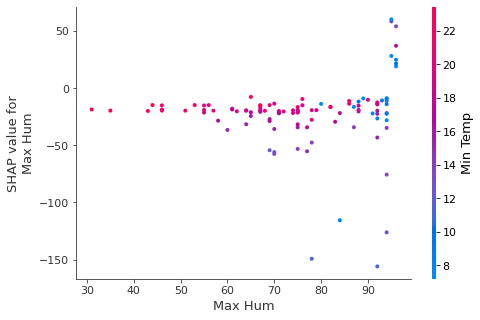

In [61]:
# Part
shap.dependence_plot('Max Hum', shap_values, X_test)

In [65]:
shap.initjs()
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values,X_test)


In [74]:
explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values[3], X_test.iloc[3])